# Jupyter Notebook for comparing synthetic data and metrics from the Synthetic Data Vault (SDV)

In [3]:
# jupyter nbconvert --to webpdf --allow-chromium-download Untitled.ipynb
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# Load data sets for comparison
original = pd.read_csv("data/german_credit.csv")
synthetic = pd.read_csv("generated_data/synthethic.csv")

In [5]:
# Check sizes of both data sets
print("Size of the original data = {}".format(len(original)))
print("Size of the synthetic data = {}".format(len(synthetic)))



Size of the original data = 1000
Size of the synthetic data = 1000


## Visual comparison

Text(0.5, 0.98, 'Original vs Synthetic Age')

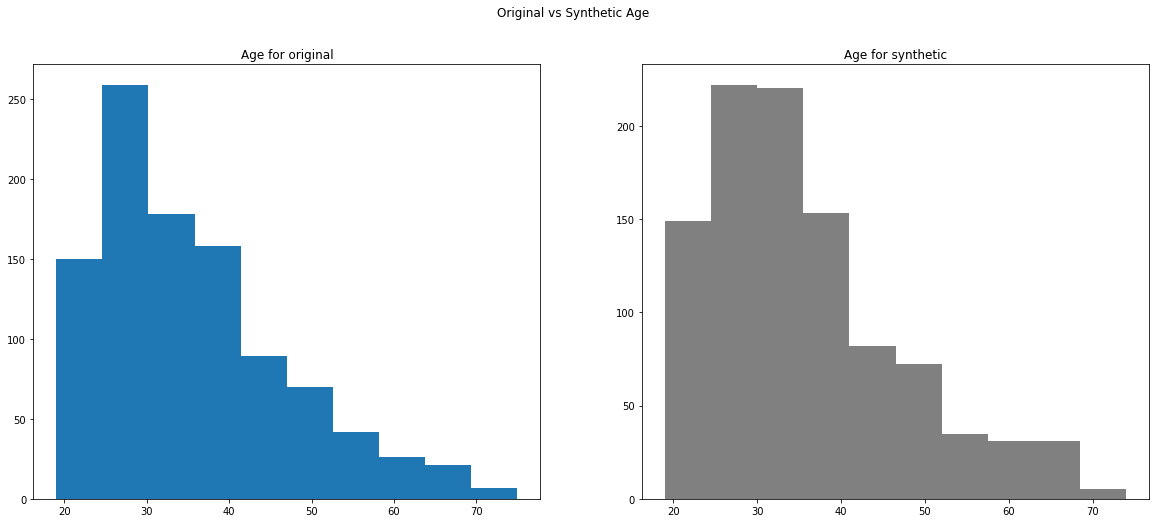

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.hist(original["Age..years."])
ax2.hist(synthetic["Age..years."], color="grey")
ax1.set_title("Age for original")
ax2.set_title("Age for synthetic")
fig.suptitle('Original vs Synthetic Age')

Text(0.5, 1.0, 'Credit Amount for synthetic')

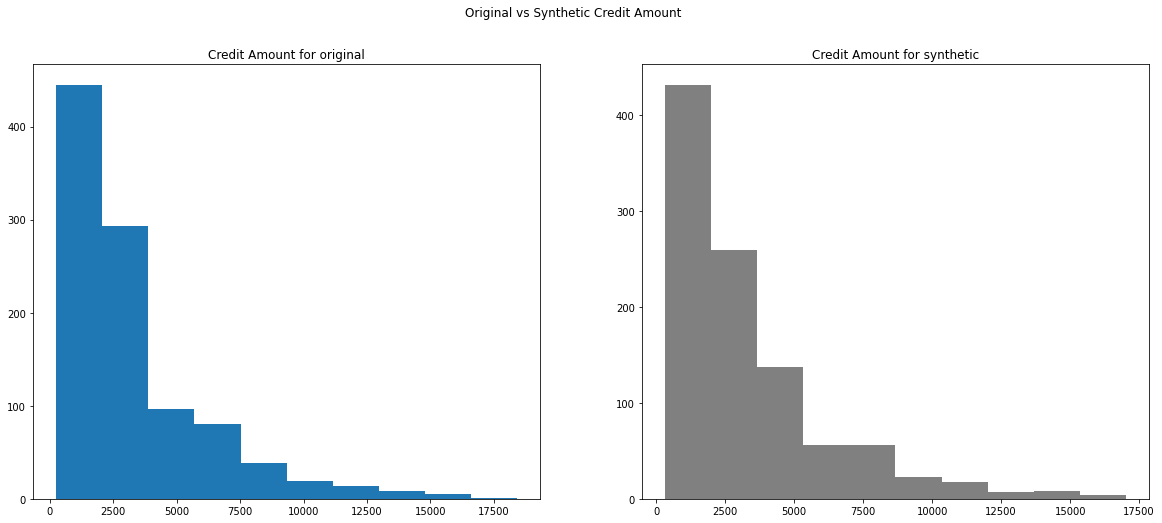

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.hist(original["Credit.Amount"])
ax2.hist(synthetic["Credit.Amount"], color="grey")
fig.suptitle('Original vs Synthetic Credit Amount')
ax1.set_title("Credit Amount for original")
ax2.set_title("Credit Amount for synthetic")

Text(0.5, 1.0, 'Marital Status for synthetic')

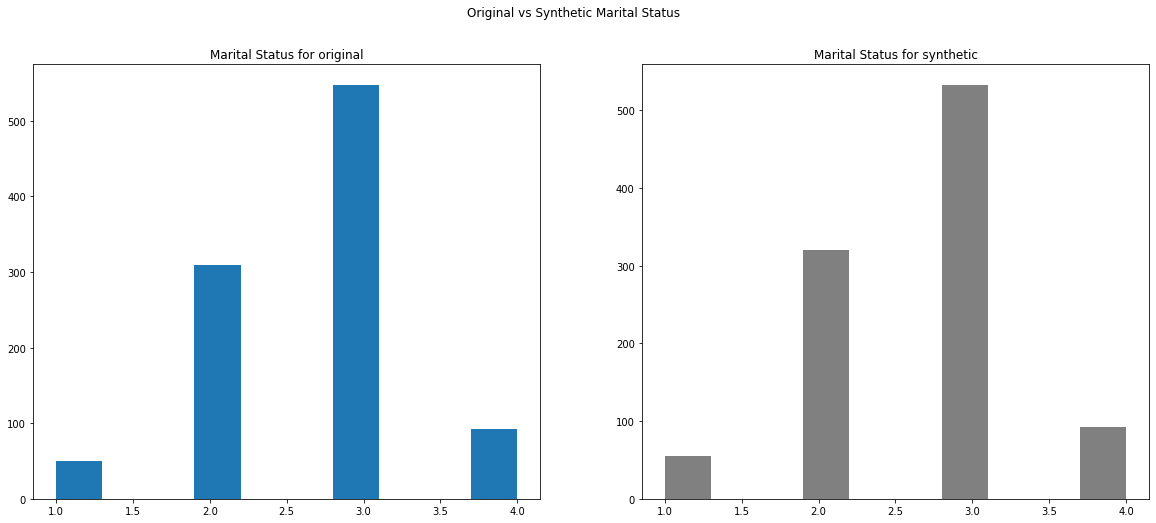

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.hist(original["Sex...Marital.Status"])
ax2.hist(synthetic["Sex...Marital.Status"], color="grey")
fig.suptitle('Original vs Synthetic Marital Status')
ax1.set_title("Marital Status for original")
ax2.set_title("Marital Status for synthetic")

Text(0.5, 1.0, 'Account Balance for synthetic')

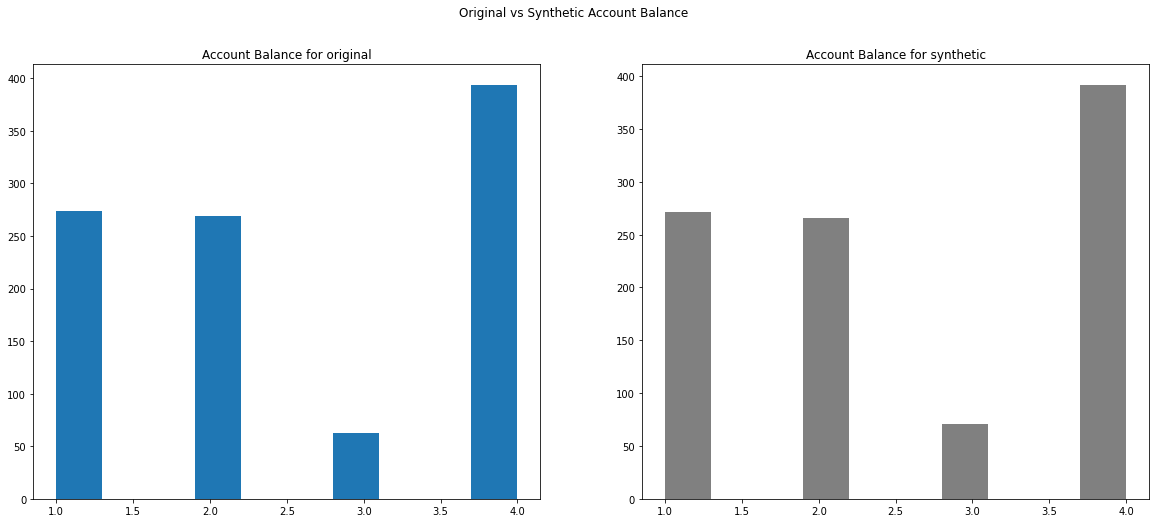

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.hist(original["Account.Balance"])
ax2.hist(synthetic["Account.Balance"], color="grey")
fig.suptitle('Original vs Synthetic Account Balance')
ax1.set_title("Account Balance for original")
ax2.set_title("Account Balance for synthetic")

Text(0.5, 1.0, 'Purpose of Credit for synthetic')

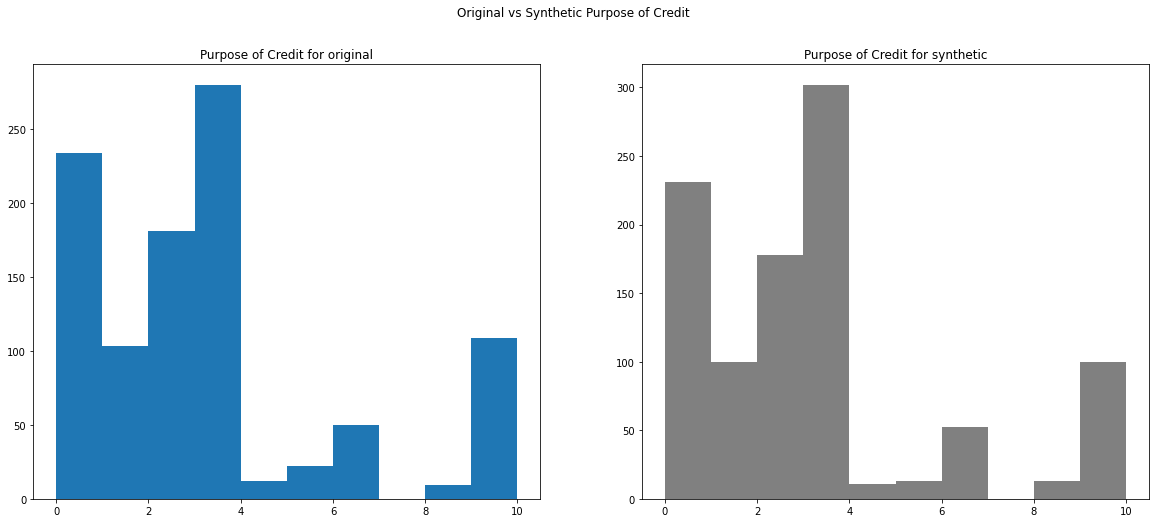

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.hist(original["Purpose"])
ax2.hist(synthetic["Purpose"], color="grey")
fig.suptitle('Original vs Synthetic Purpose of Credit')
ax1.set_title("Purpose of Credit for original")
ax2.set_title("Purpose of Credit for synthetic")

## Metrics for Synthetic Data Vault (SDV)

In [11]:
from sdv.metrics.tabular import MulticlassDecisionTreeClassifier, LinearRegression, BinaryDecisionTreeClassifier
from sdv.evaluation import evaluate
from sdv.metrics.tabular import CSTest, KSTest

#

### How well the data does when it comes to Machine Learning Models

In [12]:
BinaryDecisionTreeClassifier.compute(original, synthetic, target='Creditability')

0.7621736062103035

In [13]:
MulticlassDecisionTreeClassifier.compute(original, synthetic, target='Creditability')

0.5912923765272758

### How well the original data does when it comes to Machine Learning Models

In [14]:
# 70:30 cross validation on the real data-set example
train = original.sample(int(len(original) * 0.75))

test = original[~original.index.isin(train.index)]

In [15]:
MulticlassDecisionTreeClassifier.compute(test, train, target='Creditability')


0.6256684491978609

In [16]:
BinaryDecisionTreeClassifier.compute(test, train, target='Creditability')


0.7414330218068536

### Statistical metric

In [36]:
# https://sdv.dev/SDV/user_guides/evaluation/single_table_metrics.html
KSTest.compute(original, synthetic)

0.9846666666666669

In [25]:
from sdv.metrics.tabular import NumericalLR,NumericalRadiusNearestNeighbor

In [19]:
NumericalLR.compute(original, synthetic, key_fields=["Age..years.", "Payment.Status.of.Previous.Credit"],
                    sensitive_fields=["Credit.Amount"])

f:\facultate\year 3\cjib\use_case\venv\lib\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
f:\facultate\year 3\cjib\use_case\venv\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
f:\facultate\year 3\cjib\use_case\venv\lib\site-packages\scipy\stats\_continuous_distns.py:615: RuntimeWarning: divide by zero encountered in _beta_cdf
  return _boost._beta_cdf(x, a, b)
f:\facultate\year 3\cjib\use_case\venv\lib\site-packages\scipy\stats\_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
f:\facultate\year 3\cjib\use_case\venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = mu

0.09789406918873134

In [26]:
NumericalRadiusNearestNeighbor.compute(original, synthetic, key_fields=["Age..years.", "Payment.Status.of.Previous.Credit"],
                    sensitive_fields=["Credit.Amount"])

f:\facultate\year 3\cjib\use_case\venv\lib\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
f:\facultate\year 3\cjib\use_case\venv\lib\site-packages\scipy\stats\_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
f:\facultate\year 3\cjib\use_case\venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
f:\facultate\year 3\cjib\use_case\venv\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
f:\facultate\year 3\cjib\use_case\venv\lib\site-packages\scipy\stats\_continuous_distns.py:615: RuntimeWarning: divide by zero encountered in _beta_cdf
  return _boost._beta

0.2653051430136581

In [20]:
from sdv.metrics.tabular import LogisticDetection, SVCDetection

In [24]:
LogisticDetection.compute(test, train)

0.9513922356091031

In [23]:
SVCDetection.compute(test, train)

0.9636507936507936